In [13]:
import pandas as pd
import numpy as np
import seaborn as sns

In [14]:
df = pd.read_csv('Sheet.csv')
df.head()

,response_id,class,response_text,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,response_1,not_flagged,I try and avoid this sort of conflict,NaN,NaN,NaN,NaN,NaN
1,response_2,flagged,Had a friend open up to me about his mental ad...,NaN,NaN,NaN,NaN,NaN
2,response_3,flagged,I saved a girl from suicide once. She was goin...,NaN,NaN,NaN,NaN,NaN
3,response_4,not_flagged,i cant think of one really...i think i may hav...,NaN,NaN,NaN,NaN,NaN
4,response_5,not_flagged,Only really one friend who doesn't fit into th...,,NaN,NaN,NaN,NaN


# Exploring the Data

In [15]:
df = pd.concat([df['class'],df['response_text']],axis=1)
print(df.isnull().sum())
df.head()

class            0
response_text    0
dtype: int64


,class,response_text
0,not_flagged,I try and avoid this sort of conflict
1,flagged,Had a friend open up to me about his mental ad...
2,flagged,I saved a girl from suicide once. She was goin...
3,not_flagged,i cant think of one really...i think i may hav...
4,not_flagged,Only really one friend who doesn't fit into th...


In [16]:
df['class'] = df['class'].replace({'not_flagged':0,'flagged':1})
df.head()

,class,response_text
0,0,I try and avoid this sort of conflict
1,1,Had a friend open up to me about his mental ad...
2,1,I saved a girl from suicide once. She was goin...
3,0,i cant think of one really...i think i may hav...
4,0,Only really one friend who doesn't fit into th...


<AxesSubplot:xlabel='class', ylabel='count'>

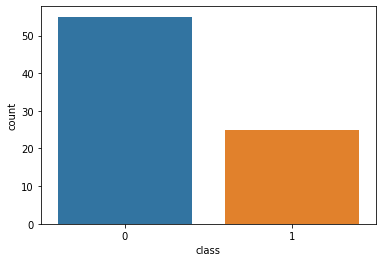

In [17]:
sns.countplot(x=df['class'])

In [18]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /Users/aswin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/aswin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /Users/aswin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Processing the Sentences

In [7]:
import nltk as nlp

processed_sentences = []
for sentence in df['response_text']:
    
    # removing non-letter symbols and then lowercasing the letters
    sentence = re.sub("[^a-zA-Z]"," ",sentence)
    sentence = sentence.lower()

    # splitting the sentence to words using tokenize and then filtering out the stopwords
    sentence = nltk.word_tokenize(sentence)
    sentence = [word for word in sentence if word not in set(stopwords.words('english'))]

    # using lemmatizer to convert the words to their base form and then joining the words to get back the sentence
    lemm = nlp.WordNetLemmatizer()
    sentence = ' '.join([lemm.lemmatize(word) for word in sentence])

    processed_sentences.append(sentence)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
max_feature = 500

cv = CountVectorizer(max_features=max_feature, stop_words='english')
matrix = cv.fit_transform(processed_sentences).toarray()

print("Most frequently used {} words {}".format(max_feature, cv.get_feature_names()))

Most frequently used 500 words ['able', 'absolutely', 'acquaintance', 'acted', 'action', 'activity', 'addiction', 'adequate', 'admit', 'advice', 'advise', 'age', 'ago', 'agony', 'alcoholic', 'allowed', 'anniversary', 'answer', 'anxiety', 'anxious', 'apposed', 'ask', 'asks', 'attention', 'aunt', 'avoid', 'away', 'bad', 'basically', 'bedroom', 'best', 'better', 'big', 'bit', 'blow', 'blue', 'blunt', 'book', 'boyfriend', 'break', 'bring', 'brother', 'brought', 'bunch', 'called', 'calling', 'calm', 'came', 'camp', 'camping', 'campsite', 'cancer', 'car', 'care', 'caring', 'category', 'caught', 'cause', 'chance', 'change', 'changed', 'chat', 'circumstance', 'clean', 'cleaning', 'cocaine', 'come', 'comfort', 'comforted', 'commit', 'common', 'complete', 'completely', 'concern', 'confines', 'conflict', 'convinced', 'cop', 'cope', 'counselor', 'countless', 'couple', 'crazy', 'cutter', 'cutting', 'damn', 'dating', 'day', 'dealing', 'dealt', 'death', 'defined', 'depressed', 'depression', 'describe

# Applying XGBoost Classifier

In [9]:
X = matrix
y = df['class'].values

In [10]:
print(X,'\n')
print(y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

[0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0
 1 0 1 0 1 0]


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(use_label_encoder=False,eval_metric='error').fit(X_train,y_train)

pred_xgb_train = xgb.predict(X_train)
pred_xgb = xgb.predict(X_test)

print('Train Accuracy: ',accuracy_score(y_train,pred_xgb_train))
print('Test Accuracy: ',accuracy_score(y_test,pred_xgb))

Train Accuracy:  0.890625
Test Accuracy:  0.75
